#### Import GISETTE label data

In [55]:
import pandas as pd
train_label = pd.read_csv('gisette_train.labels',header=None)
train_label_df=train_label.iloc[:,0]
train_label_df

0       1
1      -1
2       1
3       1
4       1
       ..
5995   -1
5996    1
5997   -1
5998   -1
5999   -1
Name: 0, Length: 6000, dtype: int64

#### Import training data, drop columns that contain nan, used " error_bad_lines=False " to ignore the data row that causes issues.  The shape of the data is 6000 rows x 5000 columns 

In [56]:
train_data = pd.read_csv('gisette_train.data',header=None, sep=' ', error_bad_lines=False)
train_data = train_data.dropna(axis=1)
train_data.shape
train_data_df = train_data

#### Describing the training dataset

In [57]:
print("\n Train : ", train_data_df.describe(),"\n")


 Train :                0            1            2            3            4     \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean    111.022833    11.251000   173.261167     0.951000    15.169167   
std     284.848291    91.448864   341.759463    25.771877   109.238579   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     999.000000   999.000000   999.000000   983.000000   999.000000   

              5            6            7            8            9     ...  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000  ...   
mean     50.209333    15.206333   323.073167     2.207667   146.355667  ...   
std     194.682629   106.963813   418.413159    39.746428   317.863306  ...   
min   

#### Using StandardScaler for standard deviation to be 1

In [58]:
from sklearn.preprocessing import StandardScaler
train_data_df.dropna(axis=1)
x = train_data_df.values
x = StandardScaler().fit_transform(x) # could also do StandardScaler().fit_transform(feature_df)
x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

#### Printing the Mean and Standard Deviation. Here the standard deviation is 0.9954

In [59]:
import numpy as np

np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

#### Getting the Principal Component 1 and Principal Component 2 of the Gisette Training Dataset

In [60]:
from sklearn.decomposition import PCA

pca_gisette_train = PCA(n_components=2)
principalComponents_gisette_train = pca_gisette_train.fit_transform(x)

principal_gisette_train_df = pd.DataFrame(data = principalComponents_gisette_train \
        , columns = ['principal component 1', 'principal component 2'])
principal_gisette_train_df

,principal component 1,principal component 2
0,27.930700,6.382595
1,18.516396,-9.880601
2,10.245800,-13.196228
3,11.003073,-3.281638
4,-13.678308,-3.768943
...,...,...
5995,-5.267381,7.005116
5996,-10.807293,1.529067
5997,4.001791,-12.656212
5998,-4.213533,-13.101436


In [61]:
pca_gisette_train.explained_variance_ratio_

array([0.02883488, 0.02258951])

#### Plotting the graph for Principal Component Analysis. The variance ratio of the Principal Component 1 is 0.02 and Principal Component 2 is 0.02. Hence the graph will not show a clear separation of the data

<Figure size 432x288 with 0 Axes>

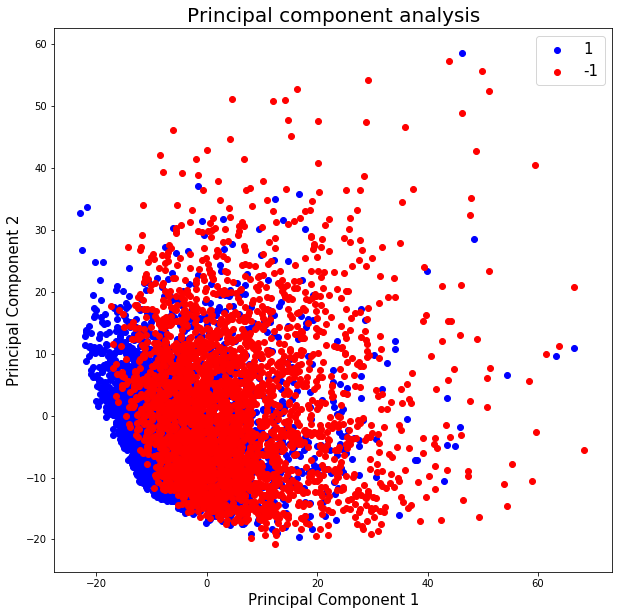

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('Principal component analysis', fontsize=20)
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = train_label_df == target
    plt.scatter(principal_gisette_train_df.loc[indicesToKeep, 'principal component 1'],
               principal_gisette_train_df.loc[indicesToKeep, 'principal component 2'],
               c = color)
plt.legend(targets,prop={'size': 15})

#### Getting the Principal Components

In [63]:
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.6f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.028835
 1: 0.022590
 2: 0.016586
 3: 0.016164
 4: 0.012354
 5: 0.011363
 6: 0.010197
 7: 0.008763
 8: 0.007237
 9: 0.006943
10: 0.006453
11: 0.005613
12: 0.005235
13: 0.004909
14: 0.004707
15: 0.004382
16: 0.004042
17: 0.003886
18: 0.003695
19: 0.003608
20: 0.003462
21: 0.003334
22: 0.003305
23: 0.003188
24: 0.002926
25: 0.002879
26: 0.002768
27: 0.002741
28: 0.002657
29: 0.002598
30: 0.002538
31: 0.002436
32: 0.002411
33: 0.002290
34: 0.002247
35: 0.002203
36: 0.002107
37: 0.002089
38: 0.002065
39: 0.001984
40: 0.001969
41: 0.001926
42: 0.001906
43: 0.001869
44: 0.001862
45: 0.001794
46: 0.001767
47: 0.001748
48: 0.001708
49: 0.001662
50: 0.001633
51: 0.001608
52: 0.001574
53: 0.001570
54: 0.001552
55: 0.001522
56: 0.001496
57: 0.001480
58: 0.001447
59: 0.001443
60: 0.001413
61: 0.001386
62: 0.001376
63: 0.001353
64: 0.001347
65: 0.001333
66: 0.001324
67: 0.001307
68: 0.001303
69: 0.001286
70: 0.001273
71: 0.001260
72: 0.001239
73: 0.001214
74: 0.001201
75: 0.001188
76: 0.001176

#### Plotting the Principal Component

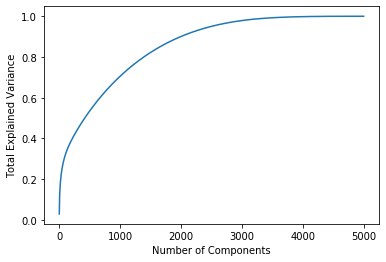

In [64]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');